# LSTM

## Leitura de Dados

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from keras.layers import Dense, LSTM, Flatten,Dropout

In [2]:
mpl.rcParams['figure.figsize']=(10,6)
mpl.rcParams['font.size']=22
sns.set_style('darkgrid')

In [3]:
bike = pd.read_csv('bicicletas.csv')

In [4]:
bike.head()

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


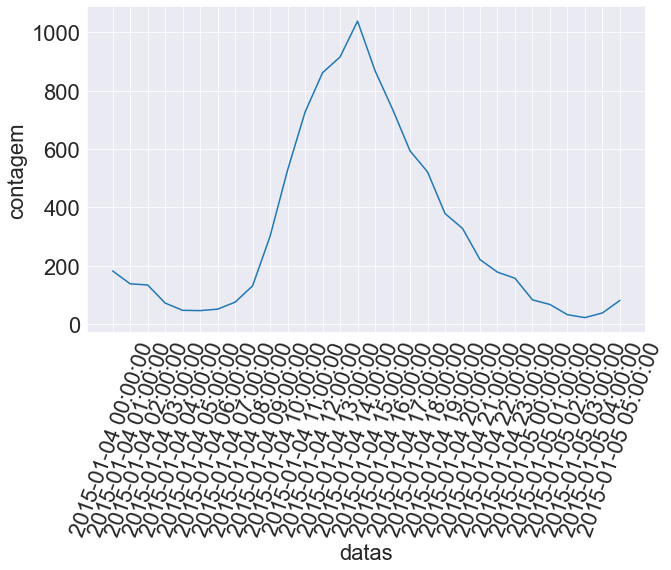

In [6]:
sns.lineplot(x='datas',y='contagem',data=bike[0:30])
plt.xticks(rotation=70)
plt.show()

## Pre processamento

In [7]:
from sklearn.preprocessing import StandardScaler

In [38]:
def split_nlegs(vetor, n_passos):
    """
        Entrada: vetor: numero de Passageiros
                 n_passos: numero de passos no regressor
        Saida:
            X_novo: Array 2D
            y_novo: Array 1D - Nosso alvo (target)
    
    """
    # Inicializacao dos novos vetores 
    X_novo, y_novo = [],[]
    
    #percorrer o vetor de entrada e agregar valores aos novos vetores
    for i in range(n_passos, vetor.shape[0]):
        X_novo.append(list(vetor.loc[i-n_passos:i-1]))
        y_novo.append(vetor.loc[i])
    X_novo, y_novo = np.array(X_novo),np.array(y_novo)
    
    return X_novo, y_novo

In [37]:
def reshape_dataframe(y_train, y_test):
    
    vetor_train = pd.DataFrame(y_train)[0]
    vetor_test = pd.DataFrame(y_test)[0]

    X_train_new, y_train_new = split_nlegs(vetor_train, 10)
    X_test_new, y_test_new = split_nlegs(vetor_test, 10)
    
    X_train_new = X_train_new.reshape((X_train_new.shape[0],X_train_new.shape[1],1))
    X_test_new = X_test_new.reshape((X_test_new.shape[0],X_test_new.shape[1],1))
    
    print(X_train_new.shape,X_test.shape)
    
    return X_train, y_train, X_test, y_test
    

In [8]:
scaler = StandardScaler()
scaler.fit(bike['contagem'].values.reshape(-1,1))

StandardScaler()

In [9]:
y = scaler.transform(bike['contagem'].values.reshape(-1,1))

In [39]:
len_train = int(len(bike)*0.9)
len_test = len(bike)-len_train

y_train = y[0:len_train]
y_test = y[len_train:len(bike)]

X_train, y_train, X_test, y_test = reshape_dataframe(y_train, y_test)

(15662, 10, 1) (1732, 10, 1)


In [14]:
#sns.lineplot(x='datas',y=y_train[:,0],data=bike[0:len_train],label='train')
#sns.lineplot(x='datas',y=y_test[:,0],data=bike[len_train:len(bike)],label='teste')
#plt.xticks(rotation=80)
#plt.show()

Temos que passar os dados na forma que a rede recorrente espera receber. 

Ela espera receber uma tridimensional, quase que idêntica à gerada pela função split_nlegs, mas ela tem uma terceira dimensão que vai ser o número de atributos por passo no tempo, no nosso caso, vai ser apenas um atributo, que é o tempo.

## Construir Modelo

In [30]:
def build_model(X_train, y_train,X_test,y_test):
    
    model = Sequential()
    model.add(LSTM(128,input_shape=(X_train.shape[1],X_train.shape[2])))
    model.add(Dense(units=1))
    model.compile(loss='mse',optimizer='RMSProp')
    
    model.fit(X_train, y_train,
              validation_data=(X_test,y_test),epochs=100)
    
    model.summary()
    
    return model

In [31]:
model = build_model(X_train, y_train,X_test,y_test)

Epoch 1/100
490/490 [==============================] - 4s 5ms/step - loss: 0.2459 - val_loss: 0.1193
Epoch 2/100
490/490 [==============================] - 2s 5ms/step - loss: 0.0731 - val_loss: 0.0407
Epoch 3/100
490/490 [==============================] - 2s 5ms/step - loss: 0.0535 - val_loss: 0.0310
Epoch 4/100
490/490 [==============================] - 2s 5ms/step - loss: 0.0461 - val_loss: 0.0729
Epoch 5/100
490/490 [==============================] - 2s 5ms/step - loss: 0.0418 - val_loss: 0.0261
Epoch 6/100
490/490 [==============================] - 2s 5ms/step - loss: 0.0388 - val_loss: 0.0270
Epoch 7/100
490/490 [==============================] - 2s 5ms/step - loss: 0.0372 - val_loss: 0.0230
Epoch 8/100
490/490 [==============================] - 2s 5ms/step - loss: 0.0348 - val_loss: 0.0246
Epoch 9/100
490/490 [==============================] - 2s 5ms/step - loss: 0.0340 - val_loss: 0.0228
Epoch 10/100
490/490 [==============================] - 3s 6ms/step - loss: 0.0326 - val_lo

490/490 [==============================] - 3s 7ms/step - loss: 0.0176 - val_loss: 0.0157
Epoch 82/100
490/490 [==============================] - 3s 7ms/step - loss: 0.0176 - val_loss: 0.0152
Epoch 83/100
490/490 [==============================] - 3s 6ms/step - loss: 0.0175 - val_loss: 0.0153
Epoch 84/100
490/490 [==============================] - 3s 7ms/step - loss: 0.0174 - val_loss: 0.0158
Epoch 85/100
490/490 [==============================] - 3s 6ms/step - loss: 0.0173 - val_loss: 0.0143
Epoch 86/100
490/490 [==============================] - 3s 7ms/step - loss: 0.0174 - val_loss: 0.0144
Epoch 87/100
490/490 [==============================] - 3s 7ms/step - loss: 0.0172 - val_loss: 0.0148
Epoch 88/100
490/490 [==============================] - 3s 7ms/step - loss: 0.0171 - val_loss: 0.0155
Epoch 89/100
490/490 [==============================] - 3s 7ms/step - loss: 0.0169 - val_loss: 0.0165
Epoch 90/100
490/490 [==============================] - 3s 7ms/step - loss: 0.0169 - val_loss: 

In [32]:
y_predicted = model.predict(X_train)

In [36]:
sns.lineplot(x='datas',y=y_train[:,0],data=bike[0:len_train],label='treino')
sns.lineplot(x='datas',y=y_predicted[:,0],data=bike[0:15662],label='predicao')

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

In [34]:
y_predicted

array([[-0.45854014],
       [-0.39271614],
       [-0.21110967],
       ...,
       [-0.9244117 ],
       [-0.91080993],
       [-0.84761006]], dtype=float32)